# Model Reproducibility



In [37]:
import sys
repo_path = '/Users/adhivp/Desktop/Ersilia_tasks' #enter your repo path here
sys.path.append(repo_path)
import pandas as pd
import numpy as np
import os
from rdkit import Chem
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data , cleaning it and saving as a file for modelhub

In [29]:
# In this codeblock I will load the predictions obtained from the original author's code implementation from the /data folder
table_S7_path = os.path.join(repo_path,'data/eos30gr/Table S7.xlsx')
table_S7 = pd.read_excel(table_S7_path,skiprows=1) # for removing the title
table_S7.head()

,DrugBank ID,Smiles,Name,ATC category,Predicted negative probability,Predicted positive probability
0,DB11581,Clc1ccc(cc1)C=1CC(CCC=1CN1CCN(CC1)c1cc(Oc2cc3c...,Venetoclax,Other antineoplastic agents,0.165396,0.834604
1,DB11363,O1CCN(CC1)C1CCN(CC1)c1cc2c(cc1CC)C(=O)c1c([nH]...,Alectinib,Protein kinase inhibitors,0.058721,0.941279
2,DB09330,O(C)c1cc(N(CCN(C)C)C)c(NC(=O)C=C)cc1Nc1nc(ccn1...,Osimertinib,Protein kinase inhibitors,0.128660,0.871340
3,DB09143,P(O)(O)(O)=O.P(O)(O)(O)=O.FC(F)(F)Oc1ccc(cc1)-...,Sonidegib,Other antineoplastic agents,0.065729,0.934271
4,DB09079,OC/1=Nc2cc(ccc2\C\1=C(\Nc1ccc(N(C(=O)CN2CCN(CC...,Nintedanib,Protein kinase inhibitors,0.338969,0.661031


In [30]:
# Standardising the smiles 
from src.smiles_processing import standardise_smiles
smiles_list = table_S7['Smiles'].tolist()
standardised_smiles_list = standardise_smiles(smiles_list)
table_S7['Standardised_smiles'] = standardised_smiles_list
table_S7.head()

,DrugBank ID,Smiles,Name,ATC category,Predicted negative probability,Predicted positive probability,Standardised_smiles
0,DB11581,Clc1ccc(cc1)C=1CC(CCC=1CN1CCN(CC1)c1cc(Oc2cc3c...,Venetoclax,Other antineoplastic agents,0.165396,0.834604,CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NC...
1,DB11363,O1CCN(CC1)C1CCN(CC1)c1cc2c(cc1CC)C(=O)c1c([nH]...,Alectinib,Protein kinase inhibitors,0.058721,0.941279,CCc1cc2c(cc1N1CCC(N3CCOCC3)CC1)C(C)(C)c1[nH]c3...
2,DB09330,O(C)c1cc(N(CCN(C)C)C)c(NC(=O)C=C)cc1Nc1nc(ccn1...,Osimertinib,Protein kinase inhibitors,0.128660,0.871340,C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c(O...
3,DB09143,P(O)(O)(O)=O.P(O)(O)(O)=O.FC(F)(F)Oc1ccc(cc1)-...,Sonidegib,Other antineoplastic agents,0.065729,0.934271,Cc1c(C(=O)Nc2ccc(N3C[C@@H](C)O[C@@H](C)C3)nc2)...
4,DB09079,OC/1=Nc2cc(ccc2\C\1=C(\Nc1ccc(N(C(=O)CN2CCN(CC...,Nintedanib,Protein kinase inhibitors,0.338969,0.661031,COC(=O)c1ccc2c(c1)NC(=O)/C2=C(\Nc1ccc(N(C)C(=O...


In [31]:
#for adding inchkeys
from src.convert_smiles import smiles_to_inchikey

table_S7['Inchikey'] = table_S7['Standardised_smiles'].apply(smiles_to_inchikey)
table_S7.head()

,DrugBank ID,Smiles,Name,ATC category,Predicted negative probability,Predicted positive probability,Standardised_smiles,Inchikey
0,DB11581,Clc1ccc(cc1)C=1CC(CCC=1CN1CCN(CC1)c1cc(Oc2cc3c...,Venetoclax,Other antineoplastic agents,0.165396,0.834604,CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NC...,LQBVNQSMGBZMKD-UHFFFAOYSA-N
1,DB11363,O1CCN(CC1)C1CCN(CC1)c1cc2c(cc1CC)C(=O)c1c([nH]...,Alectinib,Protein kinase inhibitors,0.058721,0.941279,CCc1cc2c(cc1N1CCC(N3CCOCC3)CC1)C(C)(C)c1[nH]c3...,KDGFLJKFZUIJMX-UHFFFAOYSA-N
2,DB09330,O(C)c1cc(N(CCN(C)C)C)c(NC(=O)C=C)cc1Nc1nc(ccn1...,Osimertinib,Protein kinase inhibitors,0.128660,0.871340,C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c(O...,DUYJMQONPNNFPI-UHFFFAOYSA-N
3,DB09143,P(O)(O)(O)=O.P(O)(O)(O)=O.FC(F)(F)Oc1ccc(cc1)-...,Sonidegib,Other antineoplastic agents,0.065729,0.934271,Cc1c(C(=O)Nc2ccc(N3C[C@@H](C)O[C@@H](C)C3)nc2)...,VZZJRYRQSPEMTK-CALCHBBNSA-N
4,DB09079,OC/1=Nc2cc(ccc2\C\1=C(\Nc1ccc(N(C(=O)CN2CCN(CC...,Nintedanib,Protein kinase inhibitors,0.338969,0.661031,COC(=O)c1ccc2c(c1)NC(=O)/C2=C(\Nc1ccc(N(C)C(=O...,XZXHXSATPCNXJR-ZIADKAODSA-N


In [32]:
# Dropping everything other than Standardised_smiles, Inchikey for processing
columns_to_drop = ['DrugBank ID', 'Smiles', 'Name','ATC category','Predicted negative probability','Predicted positive probability']
table_S7 = table_S7.drop(columns=columns_to_drop)
table_S7.head()


,Standardised_smiles,Inchikey
0,CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NC...,LQBVNQSMGBZMKD-UHFFFAOYSA-N
1,CCc1cc2c(cc1N1CCC(N3CCOCC3)CC1)C(C)(C)c1[nH]c3...,KDGFLJKFZUIJMX-UHFFFAOYSA-N
2,C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c(O...,DUYJMQONPNNFPI-UHFFFAOYSA-N
3,Cc1c(C(=O)Nc2ccc(N3C[C@@H](C)O[C@@H](C)C3)nc2)...,VZZJRYRQSPEMTK-CALCHBBNSA-N
4,COC(=O)c1ccc2c(c1)NC(=O)/C2=C(\Nc1ccc(N(C)C(=O...,XZXHXSATPCNXJR-ZIADKAODSA-N


In [33]:
## Saving the file 
file_path = repo_path +'/data/eos30gr/table_S7_processed.csv'
table_S7.to_csv(file_path,index=False)

## Data trying to get reproduced

- I am trying to reproduce predictions from Table S7.xlsx
- All the predicted values in Table S7 is above 50 percentage that is it's positive or considered as Hreg Blocker
- Here is the link of the same https://doi.org/10.1021/acs.jcim.8b00769
- These are considered to be Hreg blockers by clincal report
- Detailed predictions for 49 approved antineoplastic drugs (including immunomodulating agents) by deephERG. (.xlsx)

In [53]:
# In this codeblock I will recreate the figure or value I am to reproduce, for example an AUROC
table_S7_path = os.path.join(repo_path,'data/eos30gr/Table S7.xlsx')
table_S7 = pd.read_excel(table_S7_path,skiprows=1) # for removing the title
table_S7

,DrugBank ID,Smiles,Name,ATC category,Predicted negative probability,Predicted positive probability
0,DB11581,Clc1ccc(cc1)C=1CC(CCC=1CN1CCN(CC1)c1cc(Oc2cc3c...,Venetoclax,Other antineoplastic agents,1.653959e-01,0.834604
1,DB11363,O1CCN(CC1)C1CCN(CC1)c1cc2c(cc1CC)C(=O)c1c([nH]...,Alectinib,Protein kinase inhibitors,5.872136e-02,0.941279
2,DB09330,O(C)c1cc(N(CCN(C)C)C)c(NC(=O)C=C)cc1Nc1nc(ccn1...,Osimertinib,Protein kinase inhibitors,1.286597e-01,0.871340
3,DB09143,P(O)(O)(O)=O.P(O)(O)(O)=O.FC(F)(F)Oc1ccc(cc1)-...,Sonidegib,Other antineoplastic agents,6.572896e-02,0.934271
4,DB09079,OC/1=Nc2cc(ccc2\C\1=C(\Nc1ccc(N(C(=O)CN2CCN(CC...,Nintedanib,Protein kinase inhibitors,3.389692e-01,0.661031
5,DB09063,Clc1cnc(nc1Nc1ccccc1S(=O)(=O)C(C)C)Nc1cc(C)c(c...,Ceritinib,Protein kinase inhibitors,3.886143e-01,0.611386
6,DB09053,O(c1ccc(cc1)-c1nn(c2ncnc(N)c12)[C@@H]1CCCN(C1)...,Ibrutinib,Protein kinase inhibitors,2.706737e-01,0.729326
7,DB09031,P(OCCCCCCCCCCCCCCCC)(OCC[N+](C)(C)C)(=O)[O-],Miltefosine,Other antineoplastic agents,1.366690e-01,0.863331
8,DB08916,Clc1cc(Nc2ncnc3c2cc(NC(=O)\C=C\CN(C)C)c(O[C@H]...,Afatinib,Protein kinase inhibitors,1.996924e-01,0.800308
9,DB08912,s1c(c(nc1C(C)(C)C)-c1cccc(NS(=O)(=O)c2c(F)cccc...,Dabrafenib,Protein kinase inhibitors,4.270993e-01,0.572901


## Loading predictions made from modelhub, restoring the column names, according to the original table for comparision

In [54]:
table_S7_output_from_local_model_eos30gr_path = os.path.join(repo_path,'data/eos30gr/table_S7_output_from_local_model_eos30gr.csv')
table_S7_predictions = pd.read_csv(table_S7_output_from_local_model_eos30gr_path) 
table_S7_predictions

,key,input,activity10
0,LQBVNQSMGBZMKD-UHFFFAOYSA-N,CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NC...,0.440594
1,KDGFLJKFZUIJMX-UHFFFAOYSA-N,CCc1cc2c(cc1N1CCC(N3CCOCC3)CC1)C(C)(C)c1[nH]c3...,0.623762
2,DUYJMQONPNNFPI-UHFFFAOYSA-N,C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c(O...,0.481848
3,VZZJRYRQSPEMTK-CALCHBBNSA-N,Cc1c(C(=O)Nc2ccc(N3C[C@@H](C)O[C@@H](C)C3)nc2)...,0.564356
4,XZXHXSATPCNXJR-ZIADKAODSA-N,COC(=O)c1ccc2c(c1)NC(=O)/C2=C(\Nc1ccc(N(C)C(=O...,0.514851
5,VERWOWGGCGHDQE-UHFFFAOYSA-N,Cc1cc(Nc2ncc(Cl)c(Nc3ccccc3S(=O)(=O)C(C)C)n2)c...,0.659241
6,XYFPWWZEPKGCCK-GOSISDBHSA-N,C=CC(=O)N1CCC[C@@H](n2nc(-c3ccc(Oc4ccccc4)cc3)...,0.544554
7,PQLXHQMOHUQAKB-UHFFFAOYSA-N,CCCCCCCCCCCCCCCCOP(=O)([O-])OCC[N+](C)(C)C,0.734323
8,ULXXDDBFHOBEHA-CWDCEQMOSA-N,CN(C)C/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2...,0.477723
9,BFSMGDJOXZAERB-UHFFFAOYSA-N,CC(C)(C)c1nc(-c2cccc(NS(=O)(=O)c3c(F)cccc3F)c2...,0.410891


In [55]:
# Adding the DrugBank ID,Name,ATC category from previous table as per the order of indexes as it's the same even after predictions
table_S7_predictions = pd.merge(table_S7_predictions, table_S7[['DrugBank ID', 'Name', 'ATC category']], left_index=True, right_index=True)
table_S7_predictions.head()


,key,input,activity10,DrugBank ID,Name,ATC category
0,LQBVNQSMGBZMKD-UHFFFAOYSA-N,CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NC...,0.440594,DB11581,Venetoclax,Other antineoplastic agents
1,KDGFLJKFZUIJMX-UHFFFAOYSA-N,CCc1cc2c(cc1N1CCC(N3CCOCC3)CC1)C(C)(C)c1[nH]c3...,0.623762,DB11363,Alectinib,Protein kinase inhibitors
2,DUYJMQONPNNFPI-UHFFFAOYSA-N,C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c(O...,0.481848,DB09330,Osimertinib,Protein kinase inhibitors
3,VZZJRYRQSPEMTK-CALCHBBNSA-N,Cc1c(C(=O)Nc2ccc(N3C[C@@H](C)O[C@@H](C)C3)nc2)...,0.564356,DB09143,Sonidegib,Other antineoplastic agents
4,XZXHXSATPCNXJR-ZIADKAODSA-N,COC(=O)c1ccc2c(c1)NC(=O)/C2=C(\Nc1ccc(N(C)C(=O...,0.514851,DB09079,Nintedanib,Protein kinase inhibitors


In [56]:
# Dropping inch key , renaming activity10 , renaming input 
table_S7_predictions.drop(columns='key',inplace=True)
table_S7_predictions.rename(columns={'activity10':'Predicted_positive_probability','input':'smiles'},inplace=True)
table_S7_predictions.head()

,smiles,Predicted_positive_probability,DrugBank ID,Name,ATC category
0,CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NC...,0.440594,DB11581,Venetoclax,Other antineoplastic agents
1,CCc1cc2c(cc1N1CCC(N3CCOCC3)CC1)C(C)(C)c1[nH]c3...,0.623762,DB11363,Alectinib,Protein kinase inhibitors
2,C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c(O...,0.481848,DB09330,Osimertinib,Protein kinase inhibitors
3,Cc1c(C(=O)Nc2ccc(N3C[C@@H](C)O[C@@H](C)C3)nc2)...,0.564356,DB09143,Sonidegib,Other antineoplastic agents
4,COC(=O)c1ccc2c(c1)NC(=O)/C2=C(\Nc1ccc(N(C)C(=O...,0.514851,DB09079,Nintedanib,Protein kinase inhibitors


In [57]:
#rearanging columns
desired_columns_order = ['DrugBank ID','Name','ATC category','smiles','Predicted_positive_probability']
table_S7_predictions = table_S7_predictions[desired_columns_order]
table_S7_predictions.head()

,DrugBank ID,Name,ATC category,smiles,Predicted_positive_probability
0,DB11581,Venetoclax,Other antineoplastic agents,CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NC...,0.440594
1,DB11363,Alectinib,Protein kinase inhibitors,CCc1cc2c(cc1N1CCC(N3CCOCC3)CC1)C(C)(C)c1[nH]c3...,0.623762
2,DB09330,Osimertinib,Protein kinase inhibitors,C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c(O...,0.481848
3,DB09143,Sonidegib,Other antineoplastic agents,Cc1c(C(=O)Nc2ccc(N3C[C@@H](C)O[C@@H](C)C3)nc2)...,0.564356
4,DB09079,Nintedanib,Protein kinase inhibitors,COC(=O)c1ccc2c(c1)NC(=O)/C2=C(\Nc1ccc(N(C)C(=O...,0.514851


In [59]:
## Adding negative probability by subracting 1 from Predicted_positive_probability
table_S7_predictions['Predicted_negative_probability'] = 1- table_S7_predictions['Predicted_positive_probability']
table_S7_predictions.head()

,DrugBank ID,Name,ATC category,smiles,Predicted_positive_probability,Predicted_negative_probability
0,DB11581,Venetoclax,Other antineoplastic agents,CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NC...,0.440594,0.559406
1,DB11363,Alectinib,Protein kinase inhibitors,CCc1cc2c(cc1N1CCC(N3CCOCC3)CC1)C(C)(C)c1[nH]c3...,0.623762,0.376238
2,DB09330,Osimertinib,Protein kinase inhibitors,C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c(O...,0.481848,0.518152
3,DB09143,Sonidegib,Other antineoplastic agents,Cc1c(C(=O)Nc2ccc(N3C[C@@H](C)O[C@@H](C)C3)nc2)...,0.564356,0.435644
4,DB09079,Nintedanib,Protein kinase inhibitors,COC(=O)c1ccc2c(c1)NC(=O)/C2=C(\Nc1ccc(N(C)C(=O...,0.514851,0.485149


## Comparing result and original data

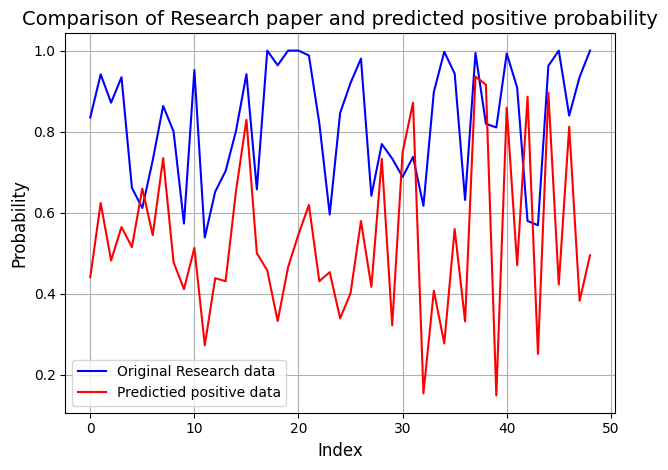

In [63]:
plt.plot(table_S7['Predicted positive probability'], color='blue', label='Original Research data')

plt.plot(table_S7_predictions['Predicted_positive_probability'], color='red', label='Predictied positive data')

plt.xlabel('Index', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title('Comparison of Research paper and predicted positive probability', fontsize=14)
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

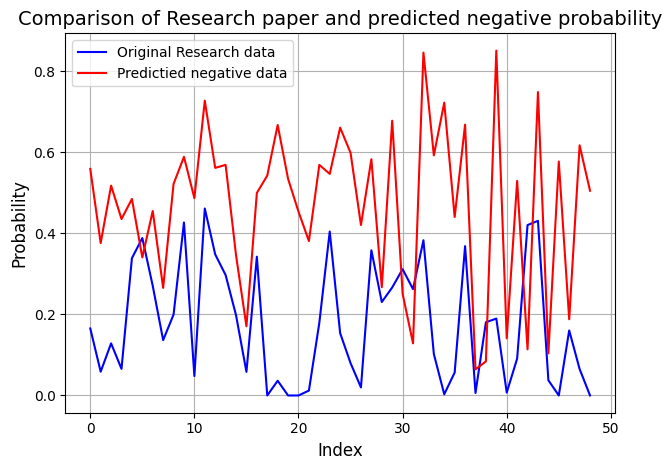

In [64]:
plt.plot(table_S7['Predicted negative probability'], color='blue', label='Original Research data')

plt.plot(table_S7_predictions['Predicted_negative_probability'], color='red', label='Predictied negative data')

plt.xlabel('Index', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title('Comparison of Research paper and predicted negative probability', fontsize=14)
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

## Comparision based on wether there are considered blocker or non-blocker (greater than 0.5 probability)

In [68]:
num_values_above_0_5 = (table_S7_predictions['Predicted_positive_probability'] > 0.5).sum()

# Print the number of values above 0.5
print("Number of values above 0.5:", num_values_above_0_5)

Number of values above 0.5: 22


## Conclusion

- Values predicted doesn't match with values in the research paper
- Values are entirely different from the paper the graph can be seen above
- Considering a treshold greater than 0.5, 22 molecules have shown as a blocker and 27 as non-blocker
- In the original research paper all 49 are said to be blockers
- So probability values were not being able to reproduce
- 22 molecules are considered as blocker